<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их" data-toc-modified-id="Откроем-файлы-и-изучим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их</a></span></li><li><span><a href="#Рассчитаем-эффективность-обогащения-на-обучающей-выборке-для-признака-rougher.output.recovery" data-toc-modified-id="Рассчитаем-эффективность-обогащения-на-обучающей-выборке-для-признака-rougher.output.recovery-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассчитаем эффективность обогащения на обучающей выборке для признака rougher.output.recovery</a></span></li><li><span><a href="#Посмотрим-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Посмотрим-признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Посмотрим признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Проведем-предобработку-данных" data-toc-modified-id="Проведем-предобработку-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вычислим-итоговой-sMAPE." data-toc-modified-id="Вычислим-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вычислим итоговой sMAPE.</a></span></li><li><span><a href="#Обучим-и-выберем-лучшую-модель" data-toc-modified-id="Обучим-и-выберем-лучшую-модель-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим и выберем лучшую модель</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откроем файлы и изучим их

In [1]:
import pandas as pd
import seaborn 
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


**План**

1. Проверим правильность рассчета эффективности обогащения. 
2. Вычислим её на обучающей выборке для признака rougher.output.recovery. 
3. Найдем MAE между нашими расчётами и значением признака. 
4. Выводы.

### Рассчитаем эффективность обогащения на обучающей выборке для признака rougher.output.recovery

C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [6]:
C = data_train['rougher.output.concentrate_au']

In [7]:
F = data_train['rougher.input.feed_au']

In [8]:
T = data_train['rougher.output.tail_au']

In [9]:
recovery = (C * (F - T)) / (F * (C - T)) * 100

In [10]:
display(recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [11]:
rougher_output_recovery = data_train['rougher.output.recovery']

In [12]:
mean_absolute_error(rougher_output_recovery, recovery)

9.73512347450521e-15

В среднем по нашим расчетам значение эффективности обогащения отклоняется на 9e-15 единиц от обучающей выборки. Это значение очень значит расчеты верны.

### Посмотрим признаки, недоступные в тестовой выборке

Добавим в тестовую выборку величину эффективности обогащения из исходной выборки, т.е. целевые признаки, для оценки моделей.

In [13]:
data_test = data_test.merge(
    data_full[['date', 'rougher.output.recovery', 'final.output.recovery']] , on='date', how='left')        

In [14]:
columns_no = set(data_train.columns) - set(data_test.columns)
print("Недоступные в тестовой выборке", columns_no)

Недоступные в тестовой выборке {'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_pb', 'rougher.output.tail_sol', 'final.output.tail_ag', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.tail_pb', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'rougher.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.au_pb_ratio', 'final.output.tail_

В обучающей выборке дополнительно содержатся данные о содержании разных металлов в продукте после очистки золотосодержащей руды. Для обучения модели эти данные не нужны, поэтому их можно будет удалить. Это сделаем позже, пока они нужны


 Код с включением в тестовую выборку части дынных из исходной выборки удалила и добавила в тестовую целевые признаки.
 

### Проведем предобработку данных

Т.к. в нужных нам столбцах 'date' отсутствуют данные. У нас не получилось заполнить пропуски. Поэтому заполним их значеним из предыдущей строки, т.к. если наблюдение проводятся в одно время, то их значения будут близки.

In [15]:
for df in (data_test, data_train, data_full):
    df.fillna(method='ffill', inplace=True)

Мы загрузили данные и выяснили, что в них имеются пропуски. Заполниять их из исходной выборки нельзя, т.к. в ней есть все недостающие признаки, в т.ч. которые мы не можем знать на входе с новыми данными (в реальных условиях).

Также сохранили в переменной columns_no фичи, которые нам не нужны будут для обучения модели. Мы удалим их из обучающей выборки после анализа данных.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Концентрация золота

In [16]:
AU = data_train[[
    "rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", 
    "final.output.concentrate_au"]]

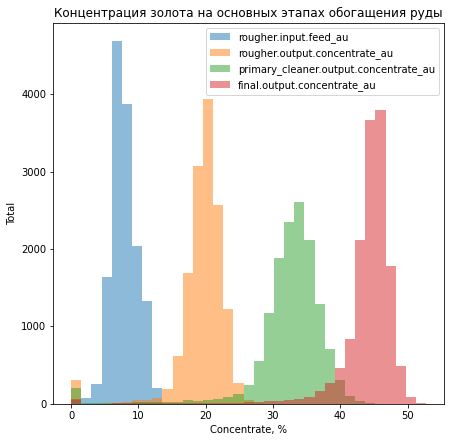

In [17]:
data_train[[
    "rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", 
    "final.output.concentrate_au"]].plot(kind='hist', bins=35, alpha=0.5, figsize=(7, 7))

plt.title('Концентрация золота на основных этапах обогащения руды')                                        
plt.legend(AU)
plt.xlabel('Concentrate, %')
plt.ylabel('Total')
plt.show()

Из графика видно, что по мере обработки руды концентрация золота увеличивается.

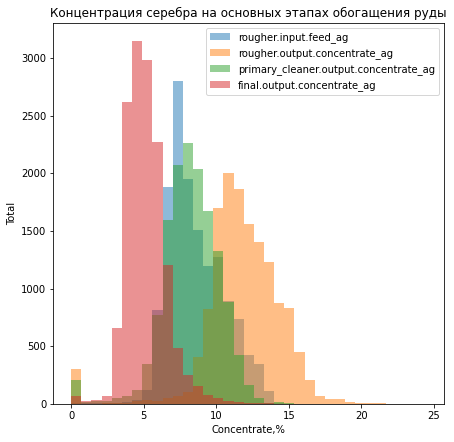

In [18]:
AG = data_train[[
    "rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", 
    "final.output.concentrate_ag"]
]
data_train[[
    "rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", 
    "final.output.concentrate_ag"]].plot(kind='hist', bins=35, alpha=0.5, figsize=(7, 7))

plt.title('Концентрация серебра на основных этапах обогащения руды')
plt.legend(AG)
plt.xlabel('Concentrate,%')
plt.ylabel('Total')
plt.show()

После финального обогащения руды концентрация серебра существенно снижается.

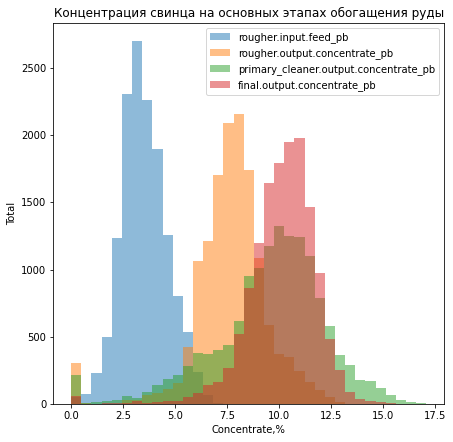

In [19]:
PB = data_train[[
    "rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", 
    "final.output.concentrate_pb"]
]

data_train[[
    "rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", 
    "final.output.concentrate_pb"]].plot(kind='hist', bins=35, alpha=0.5, figsize=(7, 7))

plt.title('Концентрация свинца на основных этапах обогащения руды')
plt.legend(PB)
plt.xlabel('Concentrate,%')
plt.ylabel('Total')
plt.show()

Мы видим, по мере обогащения руды концентрация свинца увеличивается.

###  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

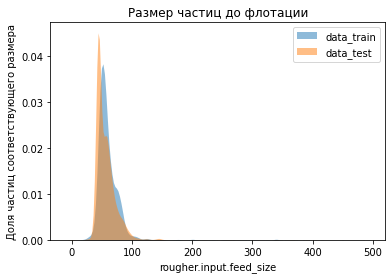

In [20]:
seaborn.kdeplot(data=data_train, x='rougher.input.feed_size', fill=True, common_norm=False, 
                palette="crest", alpha=.5, linewidth=0, label='data_train')
seaborn.kdeplot(data=data_test, x='rougher.input.feed_size', fill=True, common_norm=False, 
                palette="crest", alpha=.5, linewidth=0, label='data_test')

plt.ylabel('Доля частиц соответствующего размера')
plt.title('Размер частиц до флотации')
plt.legend();

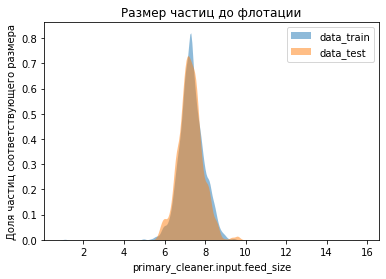

In [21]:
seaborn.kdeplot(data=data_train, x="primary_cleaner.input.feed_size", fill=True, common_norm=False, 
                palette="crest", alpha=.5, linewidth=0, label='data_train')
seaborn.kdeplot(data=data_test, x="primary_cleaner.input.feed_size", fill=True,
                common_norm=False, palette="crest", alpha=.5, linewidth=0, label='data_test')

plt.ylabel('Доля частиц соответствующего размера')
plt.title('Размер частиц до флотации')
plt.legend();

Распределение гранул сырья похоже, соответственно данные подходят для построения модели.

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [22]:
data_train_rif = (
    data_train["rougher.input.feed_au"] + data_train["rougher.input.feed_ag"] + 
    data_train["rougher.input.feed_pb"] + data_train["rougher.input.feed_sol"]
)

In [23]:
data_train_roc = (
    data_train["rougher.output.concentrate_au"] + data_train["rougher.output.concentrate_ag"] + 
    data_train["rougher.output.concentrate_pb"] + data_train["rougher.output.concentrate_sol"]
)

In [24]:
data_train_foc = (
    data_train["final.output.concentrate_au"] + data_train["final.output.concentrate_ag"] + 
    data_train["final.output.concentrate_pb"] + data_train["final.output.concentrate_sol"]
)

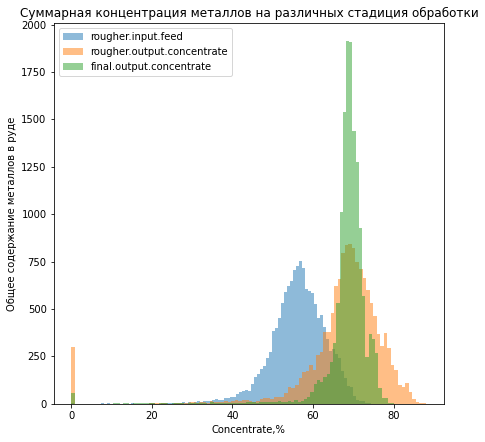

In [26]:
data_train_rif.plot(kind='hist', bins=100, alpha=0.5, figsize=(7, 7))
data_train_roc.plot(kind='hist', bins=100, alpha=0.5, figsize=(7, 7))
data_train_foc.plot(kind='hist', bins=100, alpha=0.5, figsize=(7, 7))

plt.legend(
    ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']
)
plt.xlabel('Concentrate,%')
plt.ylabel('Общее содержание металлов в руде')
plt.title('Суммарная концентрация металлов на различных стадиция обработки')
plt.show()

На графике видно, что у нас имеются аномальные значения близкие к 0. Мы их удалим.

После каждого этапа обогащения руды суммарная концентрация руды увеличивается.

In [27]:
print(data_train['rougher.input.feed_au'].sort_values().head(20))

10940    0.010000
10939    0.010000
10936    0.010000
10937    0.010000
10938    0.010000
12013    0.588152
12000    0.625968
12021    0.714036
12014    0.748198
11995    0.761151
11999    0.804901
11994    0.825207
12022    0.854959
12015    0.864044
12020    0.874188
12161    0.885875
11993    0.889864
12132    0.943717
12012    0.983689
12001    1.009195
Name: rougher.input.feed_au, dtype: float64


In [28]:
data_train = data_train[
    (data_train['rougher.input.feed_au'] > 0.5) & (data_train['rougher.input.feed_ag'] > 0.5) &
    (data_train['rougher.input.feed_pb'] > 0.5) & (data_train['rougher.input.feed_sol'] > 0.5)
]

In [29]:
data_train = data_train[
    (data_train["rougher.output.concentrate_au"] > 0.5) & (data_train["rougher.output.concentrate_ag"] > 0.5) & 
    (data_train["rougher.output.concentrate_pb"] > 0.5) & (data_train["rougher.output.concentrate_sol"] > 0.5)
]

In [30]:
data_train = data_train[
    (data_train["final.output.concentrate_au"] > 0.5) & (data_train["final.output.concentrate_ag"] > 0.5) & 
    (data_train["final.output.concentrate_pb"] > 0.5) & (data_train["final.output.concentrate_sol"] > 0.5)
]

Удалим из обучающей выборки фичи, ненужные для обучения модели.

In [31]:
columns_not = set(data_train.columns) - set(data_test.columns)

In [32]:
data_train = data_train.drop(columns=columns_not, axis=1).reset_index(drop=True)                       

In [33]:
data_train = data_train.drop(columns='date', axis=1).reset_index(drop=True)

In [34]:
data_test = data_test.drop(columns='date', axis=1).reset_index(drop=True)

In [35]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13714 non-null  float64
 1   primary_cleaner.input.sulfate               13714 non-null  float64
 2   primary_cleaner.input.depressant            13714 non-null  float64
 3   primary_cleaner.input.feed_size             13714 non-null  float64
 4   primary_cleaner.input.xanthate              13714 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13714 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13714 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13714 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13714 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13714 non-null  float64
 10  primary_cl

В процессе обогащения руды можно просдить следующие закономерности:
    
* после каждого этапа содержание золота увеличивается;
* после флотации концентрация серебра увеличивается, а затем постепенно снижается;
* по мере обогащения содержание свинца увеличивается и только после финальной очистки оно снижается.

Размер частиц после флотации уменьшается в 8 - 10 раз.

В процессе обогащения концентрация металлов в руде увеличивается. В итоге мы достигаем наиболее вероятной концентрации металлов в размере 70% от общего состава финального продукта.


## Модель

### Вычислим итоговой sMAPE.

In [36]:
def smape(target, predict):
    return 1/len(target) * np.sum(2 * np.abs(target - predict) / (np.abs(target) + np.abs(predict))*100)

In [37]:
def smape_final(sMAPE_rougher, sMAPE_final):
    return sMAPE_rougher * 0.25 + sMAPE_final * 0.75

In [38]:
scorer = make_scorer(smape, greater_is_better=False)

### Обучим и выберем лучшую модель

Выделим целевые признаки в выборках

In [39]:
features_train = data_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [40]:
target_train_r = data_train["rougher.output.recovery"]

In [41]:
target_train_f = data_train["final.output.recovery"]

In [42]:
features_test = data_test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)

In [43]:
target_test_r = data_test["rougher.output.recovery"]

In [44]:
target_test_f = data_test["final.output.recovery"]

In [45]:
pd.options.mode.chained_assignment = None #добавим эту строчку, чтобы при масштабировании код не выдавал ошибку 

scaler = StandardScaler()
#создадим структуру
scaler.fit(features_train)
#запустим обучение на основе созданного алгоритма

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)


Построим модель линейная регрессия для целевого признака rougher.output.recovery

In [46]:
model_lr_r = LinearRegression()
model_lr_r.fit(features_train, target_train_r)

LinearRegression()

In [47]:
scores_lr_r = cross_val_score(
    model_lr_r, features_train, target_train_r, cv=3, n_jobs=-1, verbose=10, scoring=scorer
)
mean_score_lr_r = (sum(scores_lr_r) / len(scores_lr_r)) * -1  

print('Средняя оценка качества модели:', mean_score_lr_r)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.192) total time=   0.0s
[CV] START .....................................................................
[CV] END ............................... score: (test=-8.691) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] END .............................. score: (test=-12.920) total time=   0.2s
Средняя оценка качества модели: 10.267866888048188


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished



Построим модель линейная регрессия для целевого признака final.output.recovery

In [48]:
model_lr_f = LinearRegression()
model_lr_f.fit(features_train, target_train_f)

LinearRegression()

In [48]:
scores_lr_f = cross_val_score(model_lr_f, features_train, target_train_f, cv=3, n_jobs=-1, verbose=10, scoring=scorer)
mean_score_lr_f = sum(scores_lr_f) / len(scores_lr_f) * -1 

print('Средняя оценка качества модели:', mean_score_lr_f)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END .............................. score: (test=-12.166) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.293) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] END .............................. score: (test=-16.690) total time=   0.5s
Средняя оценка качества модели: 13.716046886173904


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished


In [49]:
print('sMAPE финального продукта для линейной регрессии:', smape_final(mean_score_lr_r, mean_score_lr_f))

sMAPE финального продукта для линейной регрессии: 12.854001886642475



Построим модель случайного леса для целевого признака rougher.output.recovery

In [50]:
best_est = 0
best_depth = 0
best_mean_score_rfc_r = 10
for est in range(70, 110, 10):
    for depth in range(2, 6, 1):
        model_rfc_r = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345, max_leaf_nodes=50)
        model_rfc_r.fit(features_train, target_train_r)
   
        scores_rfc_r = cross_val_score(model_rfc_r, features_train, target_train_r, cv=3, n_jobs=-1, verbose=10, scoring=scorer)
        mean_score_rfc_r = (sum(scores_rfc_r) / len(scores_rfc_r)) * -1  
                
        if mean_score_rfc_r < best_mean_score_rfc_r:
            best_mean_score_rfc_r = mean_score_rfc_r
            best_est = est
            best_depth = depth
        
print('best_mean_score_rfc_r:', best_mean_score_rfc_r,  'best_est = est:',  best_est, 'best_depth:', best_depth)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.574) total time=   4.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] END ............................... score: (test=-5.847) total time=   5.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.163) total time=   4.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.091) total time=   6.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] END ............................... score: (test=-6.380) total time=   6.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s


[CV] END ............................... score: (test=-8.056) total time=   6.5s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.906) total time=   8.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] END ............................... score: (test=-6.983) total time=   8.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   17.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.214) total time=   8.7s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.988) total time=  10.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


[CV] END ............................... score: (test=-7.209) total time=  10.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   21.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.248) total time=  10.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.581) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] END ............................... score: (test=-5.852) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.176) total time=   5.5s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.098) total time=   8.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.340) total time=   8.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.1s remaining:    0.0s


[CV] END ............................... score: (test=-8.060) total time=   8.0s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.924) total time=  10.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] END ............................... score: (test=-7.024) total time=  10.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.191) total time=   9.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.989) total time=  12.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV] END ............................... score: (test=-7.241) total time=  11.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   23.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.195) total time=  12.1s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.574) total time=   6.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.848) total time=   6.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.1s remaining:    0.0s


[CV] END ............................... score: (test=-8.144) total time=   6.0s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.087) total time=   9.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.337) total time=   8.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.049) total time=   8.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.925) total time=  11.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.975) total time=  11.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.191) total time=  10.9s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.970) total time=  14.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.164) total time=  14.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   28.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.216) total time=  14.4s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.548) total time=   7.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.846) total time=   7.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.171) total time=   7.0s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.070) total time=  10.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.357) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.0s remaining:    0.0s


[CV] END ............................... score: (test=-8.090) total time=   9.9s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.910) total time=  12.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV] END ............................... score: (test=-7.082) total time=  12.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   25.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.224) total time=  12.4s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.969) total time=  15.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.2s remaining:    0.0s


[CV] END ............................... score: (test=-7.255) total time=  14.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.0s remaining:    0.0s


[CV] END ............................... score: (test=-8.219) total time=  14.8s
best_mean_score_rfc_r: 7.824254680298426 best_est = est: 90 best_depth: 3


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s finished



Оптимальные параметры для модели случайный лес с целевым признаком rougher.output.recovery:
    
    * n_estimators=90, 
    * max_depth=3, 
    * random_state=12345, 
    * max_leaf_nodes=50
     
    * Средняя оценка качества модели: 7,8


Построим модель случайного леса для целевого признака final.output.recovery

In [52]:
best_est = 0
best_depth = 0
best_mean_score_rfc_f = 10
for est in range(70, 110, 10):
    for depth in range(2, 6, 1):
        model_rfc_f = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345, max_leaf_nodes=50)
        model_rfc_f.fit(features_train, target_train_f)
        
        scores_rfc_f = cross_val_score(model_rfc_f, features_train, target_train_f, cv=3, n_jobs=-1, verbose=10, scoring=scorer)
        mean_score_rfc_f = (sum(scores_rfc_f) / len(scores_rfc_f)) * -1
        
        if mean_score_rfc_f < best_mean_score_rfc_f:
            best_mean_score_rfc_f = mean_score_rfc_f
            best_est = est
            best_depth = depth
            


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.214) total time=   4.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.697) total time=   4.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s


[CV] END .............................. score: (test=-11.538) total time=   4.5s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.977) total time=   6.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.625) total time=   6.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


[CV] END .............................. score: (test=-13.785) total time=   6.7s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.122) total time=   8.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.732) total time=   8.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   17.3s remaining:    0.0s


[CV] END .............................. score: (test=-13.417) total time=   8.5s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.158) total time=  10.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.529) total time=  10.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.7s remaining:    0.0s


[CV] END .............................. score: (test=-12.889) total time=  10.6s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.242) total time=   5.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.697) total time=   5.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   10.5s remaining:    0.0s


[CV] END .............................. score: (test=-11.529) total time=   5.3s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.015) total time=   7.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.667) total time=   7.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   15.4s remaining:    0.0s


[CV] END .............................. score: (test=-13.792) total time=   8.2s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.108) total time=   9.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.719) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   19.6s remaining:    0.0s


[CV] END .............................. score: (test=-13.401) total time=   9.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.195) total time=  12.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.535) total time=  12.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   24.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.870) total time=  12.3s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.239) total time=   6.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.691) total time=   6.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s


[CV] END .............................. score: (test=-11.551) total time=   5.9s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.002) total time=   8.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.686) total time=   8.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   17.2s remaining:    0.0s


[CV] END .............................. score: (test=-13.831) total time=   8.4s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.080) total time=  11.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.730) total time=  11.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.0s remaining:    0.0s


[CV] END .............................. score: (test=-13.393) total time=  11.4s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.179) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.547) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.9s remaining:    0.0s


[CV] END .............................. score: (test=-12.928) total time=  13.6s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.248) total time=   6.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.663) total time=   6.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.1s remaining:    0.0s


[CV] END .............................. score: (test=-11.633) total time=   6.6s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-8.997) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.656) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   19.8s remaining:    0.0s


[CV] END .............................. score: (test=-13.838) total time=  10.1s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.061) total time=  12.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.717) total time=  12.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   25.5s remaining:    0.0s


[CV] END .............................. score: (test=-13.467) total time=  12.9s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.157) total time=  15.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.554) total time=  15.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   31.4s remaining:    0.0s


[CV] END .............................. score: (test=-12.974) total time=  15.5s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.9s finished


In [53]:
print('best_mean_score_rfc_f:', best_mean_score_rfc_f,  'best_est = est:',  best_est, 'best_depth:', best_depth)

best_mean_score_rfc_f: 10 best_est = est: 0 best_depth: 0



Наши переманные не изменились, значит метрика больше 10.
Увеличим глубину для улучшения качества модели

In [54]:
best_est = 0
best_depth = 0
best_mean_score_rfc_f = 11
for est in range(70, 110, 10):
    for depth in range(6, 10, 1):
        model_rfc_f = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345, max_leaf_nodes=50)
        model_rfc_f.fit(features_train, target_train_f)
        
        scores_rfc_f = cross_val_score(model_rfc_f, features_train, target_train_f, cv=3, n_jobs=-1, verbose=10, scoring=scorer)
        mean_score_rfc_f = (sum(scores_rfc_f) / len(scores_rfc_f)) * -1
        
        if mean_score_rfc_f < best_mean_score_rfc_f:
            best_mean_score_rfc_f = mean_score_rfc_f
            best_est = est
            best_depth = depth
            
print('best_mean_score_rfc_f:', best_mean_score_rfc_f,  'best_est = est:',  best_est, 'best_depth:', best_depth)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.126) total time=  13.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.603) total time=  12.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.0s remaining:    0.0s


[CV] END .............................. score: (test=-12.176) total time=  12.9s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   38.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.068) total time=  14.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.549) total time=  14.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   28.7s remaining:    0.0s


[CV] END .............................. score: (test=-12.106) total time=  14.7s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.139) total time=  15.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.475) total time=  14.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   29.7s remaining:    0.0s


[CV] END .............................. score: (test=-12.126) total time=  15.9s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.153) total time=  16.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.421) total time=  15.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   31.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.149) total time=  16.2s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.152) total time=  15.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.636) total time=  14.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   29.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.124) total time=  14.6s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.096) total time=  16.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.573) total time=  15.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.5s remaining:    0.0s


[CV] END .............................. score: (test=-12.077) total time=  16.2s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.185) total time=  17.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.491) total time=  16.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   34.5s remaining:    0.0s


[CV] END .............................. score: (test=-12.028) total time=  17.8s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.195) total time=  18.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.439) total time=  17.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   35.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.046) total time=  18.5s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.138) total time=  15.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.678) total time=  15.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   31.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.125) total time=  15.7s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.083) total time=  18.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.597) total time=  17.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   36.2s remaining:    0.0s


[CV] END .............................. score: (test=-12.075) total time=  18.2s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.177) total time=  19.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.502) total time=  18.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   38.3s remaining:    0.0s


[CV] END .............................. score: (test=-12.072) total time=  19.3s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.188) total time=  20.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.446) total time=  19.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   40.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.091) total time=  20.7s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.124) total time=  18.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.683) total time=  17.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   35.5s remaining:    0.0s


[CV] END .............................. score: (test=-12.139) total time=  17.6s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.088) total time=  20.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.660) total time=  20.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   40.9s remaining:    0.0s


[CV] END .............................. score: (test=-12.131) total time=  20.6s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.148) total time=  22.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.524) total time=  22.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   44.4s remaining:    0.0s


[CV] END .............................. score: (test=-12.149) total time=  23.2s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ............................... score: (test=-9.166) total time=  24.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   24.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.474) total time=  22.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   46.9s remaining:    0.0s


[CV] END .............................. score: (test=-12.162) total time=  24.2s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished



Сделала небольшой интервал для проверки глубины и количества деревьев, иначе очень долго код читается.

In [55]:
print('best_mean_score_rfc_f:', mean_score_rfc_f,  'best_est = est:',  best_est, 'best_depth:', best_depth)

best_mean_score_rfc_f: 10.267681442050357 best_est = est: 80 best_depth: 9



Оптимальные параметры для модели случайный лес с целевым признаком final.output.recovery:
    
    * n_estimators=80, 
    * max_depth=9, 
    * random_state=12345, 
    * max_leaf_nodes=50
    
    * Средняя оценка качества модели: 10,3


Посчитаем эффективность обогащения финального продукта для модели линейная регрессия.

In [56]:
print('sMAPE финального продукта для случайного леса:', smape_final(mean_score_rfc_r, mean_score_rfc_f))

sMAPE финального продукта для случайного леса: 9.737684856271084




    * sMAPE финального продукта для линейной регрессии - 12,9   
    * sMAPE финального продукта для случайного леса - 9,7
    
В нашем случае чем меньше величина, тем лучше, поэтому для тестирования мы выберем модель случайный лес.

Алексей, никак не могу понять в чем здесь ошибка. Помоги, пожалуйста, разобраться.

In [ ]:
predicted_r = model_rfc_r.predict(features_test)

In [64]:
sMAPE_rougher = smape(target_test_r, predicted_r)

In [62]:
predicted_f = model_rfc_f.predict(features_test)

In [67]:
sMAPE_final = smape(target_test_f, predicted_f)

In [68]:
sMAPE_end =  smape_final(sMAPE_rougher, sMAPE_final)
print('Итоговый sMAPE:', sMAPE_end)

Итоговый sMAPE: 9.479693274079152


Проверим как поведет себя константная модель

In [71]:
predicted_const_mean = pd.Series(target_train_r.mean(), index=target_test_r.index) 
sMAPE_const_r = smape(target_test_r, predicted_const_mean)
print('sMAPE для final, константная модель:',sMAPE_r)

sMAPE для final, константная модель: 9.045707453606788


In [72]:
predicted_const_mean = pd.Series(target_train_f.mean(), index=target_test_f.index) 
sMAPE_const_f = smape(target_test_f, predicted_const_mean)
print('sMAPE для final, константная модель:',sMAPE_f)

sMAPE для final, константная модель: 10.05329370382435


In [74]:
sMAPE_const_end =  smape_final(sMAPE_const_r, sMAPE_const_f)
print('Итоговый sMAPE:', sMAPE_const_end)

Итоговый sMAPE: 9.801397141269959


**Общий вывод**


Целью нашего проекта было создание модель для предсказания коэффициента восстановления золота из золотосодержащей руды.
    
Мы проверили правильность расчета эффективности восстановления. Расчеты верны.
    
Далее проверили данные и устранили пропуски, добавив значения из предыдущих строк. Выяснили какие данные есть в обучающей выборке, но отсутствуют в тестовой выборке и удалили их из обучающей.
    
Посмтрели как меняется содержание металлов и размер гранил на разных этапах обогашения золотосодержащей руды

Для предсказания коэффициента восстановления золота из руды мы обучили и проверили 2 модели: линейная регрессия и случайный лес, - и более эффективной оказалась модель случайный лес.
    
Мы оценивали модели кросс-валидацией с метрикой sMAPE:
    * sMAPE финального продукта для линейной регрессии - 12,9   
    * sMAPE финального продукта для случайного леса - 9,7
    

sMAPE финального продукта модели случайный лес на тестовой выборке оказался лучше, чем на обучающей и составил 9,48.
Стоит отметить, что sMAPE модели случайный лес лучше констатной моделие на 0,32. 
